# 乳腺癌检测

注：依据保密性原则，该notebook所展示的只是原数据切片，且所有数据经过了脱敏性处理

医疗人员采集了患者乳腺肿块经过细针穿刺（FNA）后的数字化图像，并且对这些数字图像进行了特征提取，这些特征可以描述图像中的细胞核呈现。肿瘤可以分为两性和恶性。
数据一共包括了32个字段，代表含义如下：

字段 | 含义 
-|-
ID | ID标识
diagnosis | M:恶性，B：良性
radius_mean | 半径（点中心到边缘的距离）平均值
texture_mean | 文理（灰度值的标准差）平均值
perimeter_mean | 周长 平均值
area_mean | 面积 平均值
smoothness_mean | 平滑程度（半径内的局部变化）平均值
compactness_mean | 紧密度（=周长*周长/面积-1.0）平均值
concavity_mean | 凹度（轮廓凹部的严重程度）平均值
concave points_mean | 凹缝（轮廓的凹部份）平均值
symmetry_mean | 对称性 平均值
fractal_dimension_mean | 分型维数（=海岸线近似-1）平均值
radius_se | 半径（点中心到边缘的距离）标准差
texture_se | 文理（灰度值的标准差）标准差
perimeter_se | 周长 标准差
area_se | 面积 标准差
smoothness_se | 平滑程度（半径内的局部变化）标准差
compactness_se | 紧密度（=周长*周长/面积-1.0）标准差
concavity_se | 凹度（轮廓凹部的严重程度）标准差
concave points_se | 凹缝（轮廓的凹部份）标准差
symmetry_se | 对称性 标准差
fractal_dimension_se | 分型维数（=海岸线近似-1）标准差
radius_worst | 半径（点中心到边缘的距离）最大值
texture_worst | 文理（灰度值的标准差）最大值
perimeter_worst | 周长 最大值
area_worst | 面积 最大值
smoothness_worst | 平滑程度（半径内的局部变化）最大值
compactness_worst | 紧密度（=周长*周长/面积-1.0）最大值
concavity_worst | 凹度（轮廓凹部的严重程度）最大值
concave points_worst | 凹缝（轮廓的凹部份）最大值
symmetry_worst | 对称性 最大值
fractal_dimension_worst | 分型维数（=海岸线近似-1）最大值

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)

In [110]:
d = data.columns

In [111]:
d = pd.Series(d)

In [112]:
list(d.str.replace(',', ''))

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# 特征分析

## 特征详情

In [113]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [115]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


可以发现，32个字段中，ID可以去掉，diagnosis字段用二进制数字代替，其余30个字段可以划分为3组字段，下划线中的mean、se和worst代表了每组字段的度量方式，分别为平均值、标准差、最大值。

## 数据清理

In [116]:
# 将特征字段分成 3 组
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:21])
features_worst = list(data.columns[21:31])

ID = data['id']
data.drop("id", axis=1, inplace=True)


# 将 B 良性替换为 0，M 恶性替换为 1
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

## 特征统计

初步了解数据间的相关性，为构造特征工程以及模型建立做准备

In [117]:
# 良性比率

data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

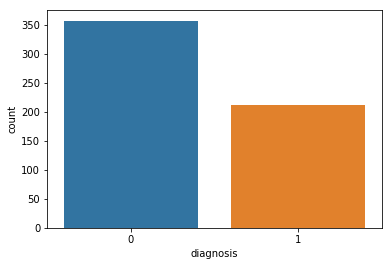

In [118]:
sns.countplot(data['diagnosis'], label="Count")

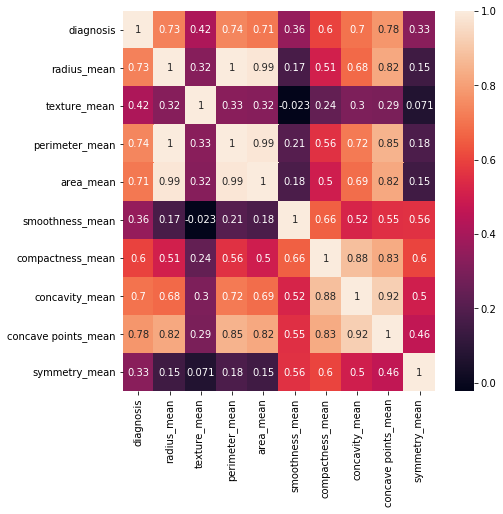

In [119]:
# 相关性分析

corr = data[features_mean].corr()
a = plt.subplots(figsize=(7,7))
a = sns.heatmap(corr, annot=True)

可以看出：
- 字段radius_mean、perimeter_mean 和 area_mean 相关性较大
- 字段compactness_mean、concavity_mean、concave_points_mean 相关性较大

为避免多重共线性，以导致过拟合，我在这实行降维，即从这两组相似字段中分别选出一个特征做为代表。

同时，mean、se 和 worst 这三组的正是对同一组内容的不同度量方式，则只保留其中一组，这里我选择保留mean组（其他组可作为参数优化，例如候选）

## 进一步探索分析各个数据与结果的关系

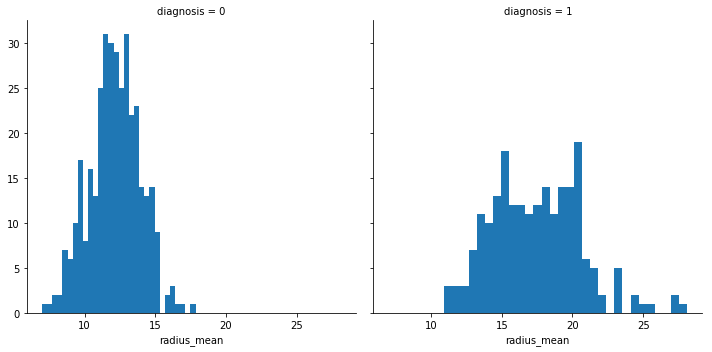

In [120]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'radius_mean', bins=30)

可以发现，radius_mean对肿瘤的症状是有影响的，恶性肿瘤集中于15——20 radius_mean 区间

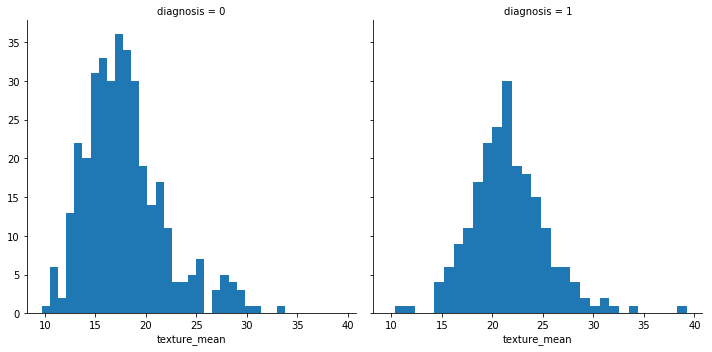

In [121]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'texture_mean', bins=30)

从图中可以看出，texture_mean对良性、恶性肿瘤具有相似的分布，无法判别出额外信息，这里将删除该特征，并作为候选参数。

余下变量皆为连续型变量对二元数值的分布，分析类似，仅给出结论

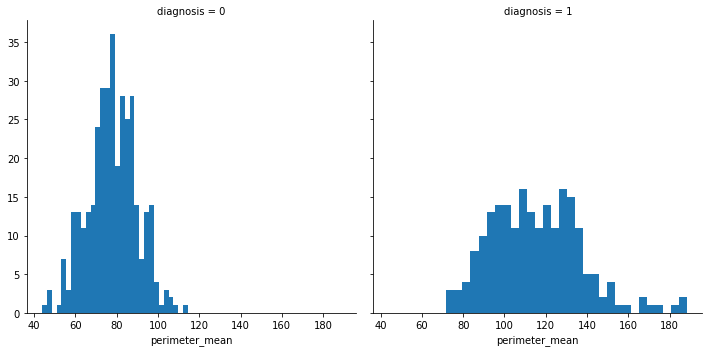

In [122]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'perimeter_mean', bins=30)

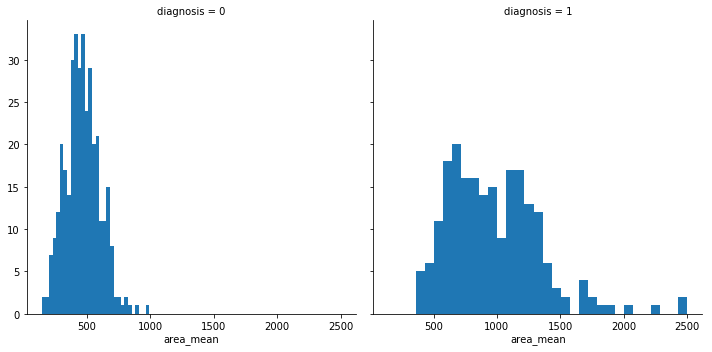

In [123]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'area_mean', bins=30)

保留

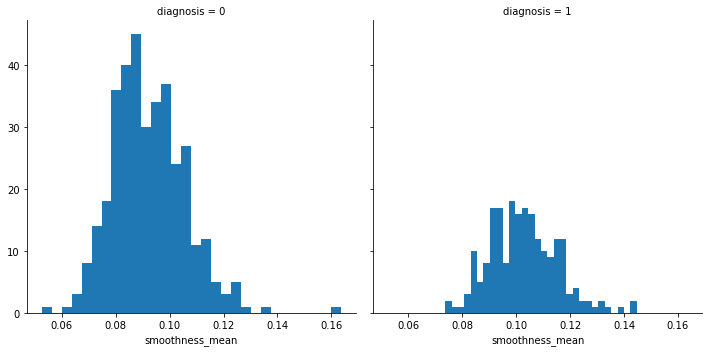

In [124]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'smoothness_mean', bins=30)

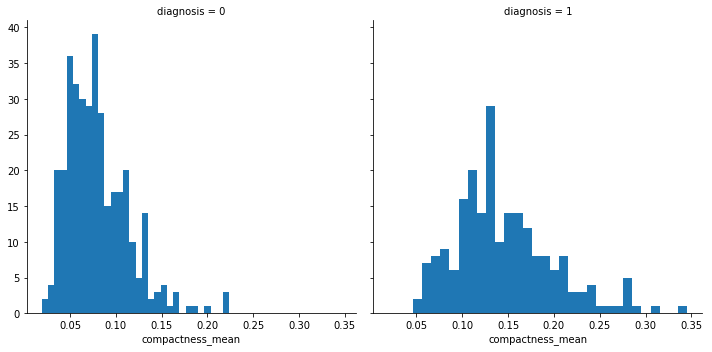

In [125]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'compactness_mean', bins=30)

保留

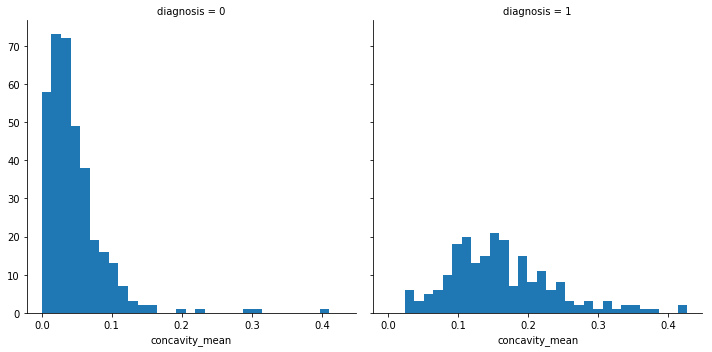

In [126]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'concavity_mean', bins=30)

保留

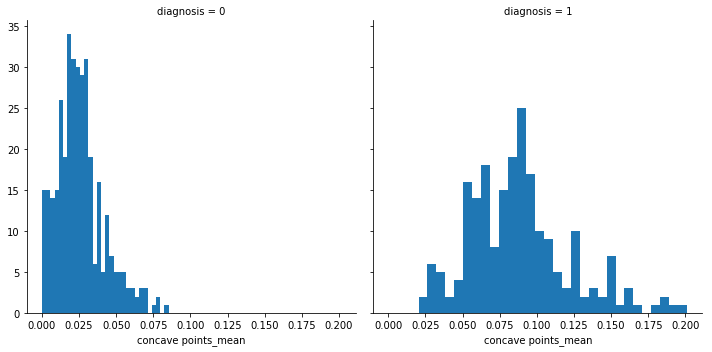

In [127]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'concave points_mean', bins=30)

保留

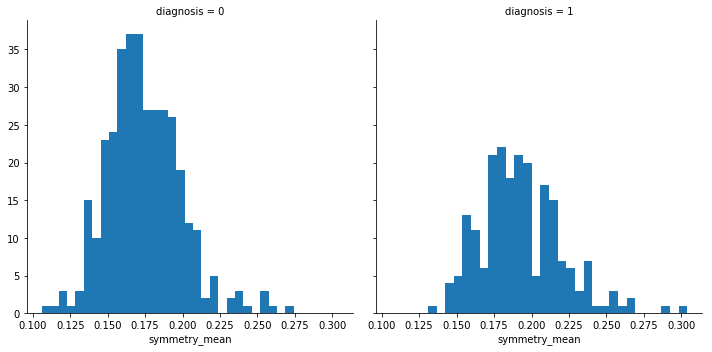

In [128]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'symmetry_mean', bins=30)

保留

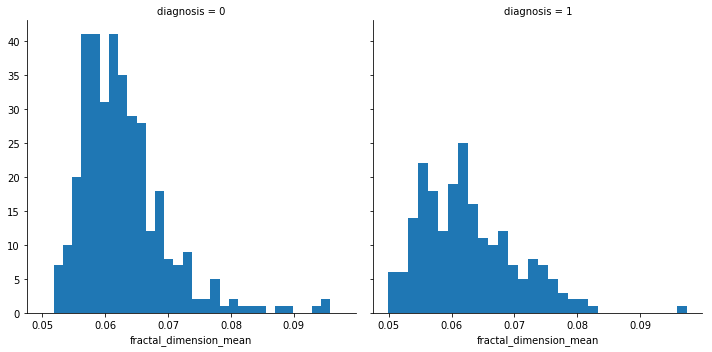

In [129]:
g = sns.FacetGrid(data,col='diagnosis', height=5)
g.map(plt.hist, 'fractal_dimension_mean', bins=30)

保留

#### 最终特征选择为

In [130]:
features_remain = ['radius_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

> 特征工程完成，划分数据集

In [131]:
from sklearn.model_selection import train_test_split
# 抽取 30% 的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3)
# 抽取特征选择的数值作为训练和测试数据
train_X = train[features_remain]
train_y=train['diagnosis']
test_X= test[features_remain]
test_y =test['diagnosis']

## 数据规约
- 线性模型需要用标准化的数据建模， 而树类模型不需要标准化的数据


In [132]:
from sklearn.preprocessing import StandardScaler
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
train_X_sd = ss.fit_transform(train_X)
test_X_sd = ss.transform(test_X)

# 建立模型

## 单模型建立

### 随机森林

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 3, max_depth = 6, oob_score = True)
rf.fit(train_X, train_y)
rf_predic = rf.predict(test_X)

In [134]:
from sklearn.metrics import accuracy_score

print('准确率: ', accuracy_score(rf_predic,test_y))

准确率:  0.9181286549707602


In [135]:
# 随机森林是随机选取特征进行建模的,所以每次的结果可能都有点小差异
# 如果分数足够好,可以将该模型保存起来,下次直接调出来使用0.81339 'rf10.pkl'
from sklearn.externals import joblib
joblib.dump(rf, 'rf10.pkl') #将模型保存到本地，名称为rf10.pkl

['rf10.pkl']

### LohisticRegression

使用 GridSearchCV 做参数自动调优

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}

clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_X_sd, train_y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [137]:
# 打印参数的分情况
means = clf.cv_results_['mean_test_score']
means

array([0.94409865, 0.94409865, 0.96028951, 0.96028951, 0.96831646,
       0.96831646, 0.96871066, 0.96871066, 0.96924949, 0.96924949])

In [138]:
# 打印最佳参数
params =clf.best_params_
params

{'C': 10, 'max_iter': 100}

In [140]:
lr = LogisticRegression('l2', C=10, solver='liblinear')
lr.fit(train_X_sd, train_y)
lr_predic = lr.predict(test_X_sd)

In [141]:
print('准确率: ', accuracy_score(lr_predic,test_y))

准确率:  0.9181286549707602


SVM

In [142]:
from sklearn.metrics import accuracy_score
from sklearn import svm

svc = svm.SVC()

clf = GridSearchCV(svc, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_X_sd, train_y)

print('最佳参数', clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


最佳参数 {'C': 10, 'max_iter': 250}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [143]:
svc = svm.SVC()
svc.fit(train_X_sd,train_y)
# 用测试集做预测
svc_predic = svc.predict(test_X_sd)
print('准确率: ', accuracy_score(svc_predic,test_y))

准确率:  0.9298245614035088


### GBDT

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(learning_rate=0.7,max_depth=6,n_estimators=100,min_samples_leaf=2)

gbdt.fit(train_X_sd,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.7, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [145]:
gbdt_predic = gbdt.predict(test_X_sd)
print('准确率: ', accuracy_score(gbdt_predic,test_y))

准确率:  0.9064327485380117


### xgboost

In [146]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6)
xgb.fit(train_X_sd,train_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, min_samples_leaf=3, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [147]:
xgb_predic = xgb.predict(test_X_sd)
print('准确率: ', accuracy_score(xgb_predic,test_y))

准确率:  0.9064327485380117


## 模型融合

In [148]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,max_iter=100)

import xgboost as xgb
xgb = xgb.XGBClassifier(max_depth=6,min_samples_leaf=2,n_estimators=100,num_round = 5)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

from sklearn import svm
svc = svm.SVC()

vot = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gbdt',gbdt),('xgb',xgb), ('svm', svc)], voting='hard')
vot.fit(train_X_sd,train_y)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [149]:
vot_predic = vot.predict(test_X_sd)
print('准确率: ', accuracy_score(vot_predic,test_y))

准确率:  0.9239766081871345


# 总结

- 单个模型包括随机森领、逻辑回归、SVM、XGBOOST、GBDT
- 多个模型使用了VOTING

- 单个模型中，得分最高为SVM：0.9298245614035088
- 融合模型 VOTING 得分为：0.9239766081871345

### 优化改进

- 特征工程步骤上仍有许多未使用的特征变量，可以通过选择其他特征优化模型
- 由于训练模型的硬件限制，在参数自动调优上只对部分模型进行了使用，若提升硬件性能，能发挥更多参数自动调优潜力
- 模型融合的步骤上，还可以使用其他方法，如STACKING